# LAB 1a - ANNDA

In [768]:
import lab1a
import numpy as np
import matplotlib.pyplot as plt
import time

## Define architecture and learning params

In [769]:
# Define Network Architecture
X_dim = 3
Y_dim = 1
N = 100 # Number of Samples per class

In [770]:

# Define learning params
lr = 0.001
n_epocs = 30

## Define patterns and labels

In [771]:
# Rows = Dimensionality of input
# Columns = Number of inputs

# Class A
mean_A, cov_A = (1,1), [[1.5**2, 0], [0, 1.5**2]]
X_A = np.random.multivariate_normal(mean_A, cov_A, N).T
X_A = np.append(X_A,[np.ones(N)],axis=0) # Account for bias term
X_A = np.append(X_A,[-1*np.ones(N)],axis=0) # Class label

# Class B
mean_B, cov_B = (5,5), [[1.5**2, 0], [0, 1.5**2]]
X_B = np.random.multivariate_normal(mean_B, cov_B, N).T
X_B = np.append(X_B,[np.ones(N)],axis=0) # Account for bias term
X_B = np.append(X_B,[np.ones(N)],axis=0) # Class label

# Mix classes and sample N columns
random_col_indices = np.random.choice(2*N, size=2*N, replace=False)
X = np.append(X_A,X_B,axis=1)[:,random_col_indices]

# Define labels vector
T = X[-1,:]
X = X[:-1,:]

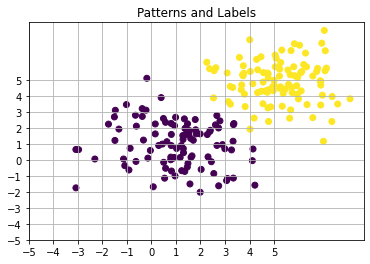

In [772]:
# Plot the patterns and labels
min1, max1 = X[1, :].min() - 1, X[1, :].max() + 1 #1st feature
min2, max2 = X[0, :].min() - 1, X[0, :].max() + 1 #2nd feature

fig, ax = plt.subplots()
ax.scatter(X[0,:], X[1,:], c=T)
ax.set(xticks=np.arange(-5, 6),
       yticks=np.arange(-5, 6))
ax.grid(visible = True)
ax.set_title('Patterns and Labels')
plt.show()

## Initialize weights

In [773]:
# Initialize weights matrix sampling from normal distribution
W = np.random.normal(0, 1, size=(Y_dim, X_dim))

## Perceptron Sequential Learning

In [774]:
# LEARNING PROCESS
def perceptron_sequential_learning (lr, n_epocs, N, X, T, W) :
    epocs_mse = []
    for k in range(n_epocs) :
        for i in range(2*N) :
            x = X[:,i]
            t = T[i]

            # Update weights
            delta_W = lab1a.perceptron_rule_sequential(lr,x,t,W)
            W = W + delta_W

        # Update error
        e = W.dot(X)-T
        mse = np.sum(np.square(e))/(2*N)
        epocs_mse.append(mse)

        #print('{}. MSE = {} , delta_W = {}'.format(i,mse,delta_W))
        #time.sleep(0.5)

    return W, epocs_mse

In [775]:
# Initialize weights matrix sampling from normal distribution
W = np.random.normal(0, 1, size=(Y_dim, X_dim))
# Iterate over epocs to get final weights
W, epocs_mse = perceptron_sequential_learning (lr, n_epocs, N, X, T, W)

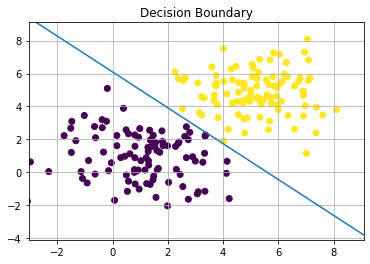

In [776]:
# Show final decision boundary
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Decision Boundary')
ax.set_xlim(min1,max1)
ax.set_ylim(min2,max2)
ax.scatter(X[0,:], X[1,:], c=T)
x_coords, y_coords = lab1a.decision_boundary(W)
ax.plot(x_coords,y_coords)
plt.show()

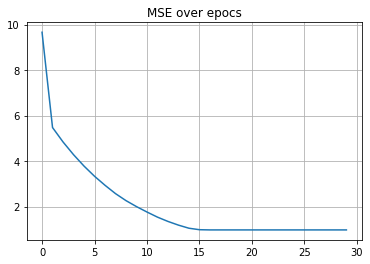

In [777]:
# Show mse over iterations
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('MSE over epocs')
ax.plot(epocs_mse)
plt.show()

In [778]:
# Test classifier
T_guessed = lab1a.classify(W,X,T)

Class A. Hits = 100, Fails = 0, Accuracy = 100.0%
Class B. Hits = 100, Fails = 0, Accuracy = 100.0%
Hits = 200, Fails = 0, Accuracy = 100.0%


### Perceptron Batch Learning

In [779]:
# LEARNING PROCESS
def perceptron_batch_learning (lr, n_epocs, N, X, T, W) :
    epocs_error = []
    epocs_error.append(lab1a.accuracy(W,X,T))
    for k in range(n_epocs) :
        delta_W = 0
        mismatched_matrix = np.ones(n_epocs)  # Percentage of mismatched points per epoch
        for i in range(2*N) :
            x = X[:,i]
            t = T[i]

            # Update increment
            delta_W += lab1a.perceptron_rule_sequential(lr,x,t,W)
            
        # Update weights
        W = W + delta_W
        
        # Update error
        epocs_error.append(lab1a.accuracy(W,X,T))

        #print('{}. MSE = {} , delta_W = {}'.format(i,mse,delta_W))
        #time.sleep(0.5)

    return W, epocs_error

In [780]:
# Initialize weights matrix sampling from normal distribution
W_init = np.random.normal(0, 1, size=(Y_dim, X_dim))
# Iterate over epocs to get final weights
lr = 0.00075
W, epocs_error = perceptron_batch_learning (lr, n_epocs, N, X, T, W_init)

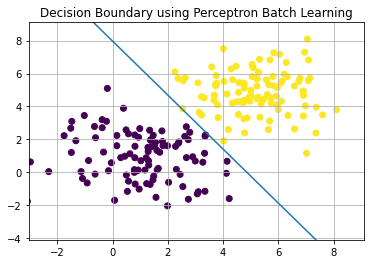

In [781]:
# Show final decision boundary
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Decision Boundary using Perceptron Batch Learning')
ax.set_xlim(min1,max1)
ax.set_ylim(min2,max2)
ax.scatter(X[0,:], X[1,:], c=T)
x_coords, y_coords = lab1a.decision_boundary(W)
ax.plot(x_coords,y_coords)
plt.show()

In [782]:
# Test classifier
T_guessed = lab1a.classify(W,X,T)

Class A. Hits = 100, Fails = 0, Accuracy = 100.0%
Class B. Hits = 100, Fails = 0, Accuracy = 100.0%
Hits = 200, Fails = 0, Accuracy = 100.0%


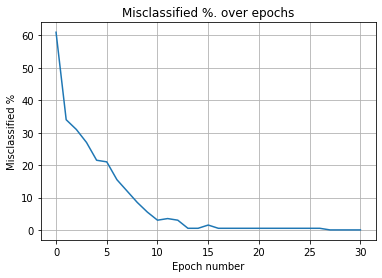

In [783]:
# Plot accuracy
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Misclassified %. over epochs')
ax.plot(epocs_error)
ax.set_xlabel('Epoch number')
ax.set_ylabel('Misclassified %')
plt.show()

## Delta Sequential Learning

In [784]:
# LEARNING PROCESS
def delta_sequential_learning (lr, n_epocs, N, X, T, W) :
    epocs_mse = []
    samples_mse = []
    for k in range(n_epocs) :
        for i in range(N*2) :
            x = X[:,i]
            t = T[i]

            # Update weights
            delta_W = lab1a.delta_rule_sequential(lr,x,t,W)
            W = W + delta_W

            # Update error
            e = W.dot(X)-T
            mse = np.sum(np.square(e))/(2*N)
            samples_mse.append(mse)


        # Update error
        e = W.dot(X)-T
        mse = np.sum(np.square(e))/(2*N)
        epocs_mse.append(mse)

        #print('{}. MSE = {} , delta_W = {}'.format(i,mse,delta_W))
        #time.sleep(0.5)

    return W, epocs_mse, samples_mse

In [785]:
# Iterate over epocs to get final weights
W, epocs_mse, samples_mse = delta_sequential_learning (lr, n_epocs, N, X, T, W_init)

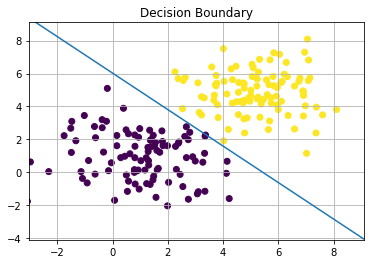

In [786]:
# Show final decision boundary
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Decision Boundary')
ax.set_xlim(min1,max1)
ax.set_ylim(min2,max2)
ax.scatter(X[0,:], X[1,:], c=T)
x_coords, y_coords = lab1a.decision_boundary(W)
ax.plot(y_coords,x_coords)
plt.show()

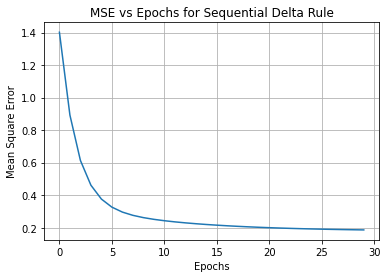

In [787]:
# Show mse over epochs
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('MSE vs Epochs for Sequential Delta Rule')
ax.set_ylabel('Mean Square Error')
ax.set_xlabel('Epochs')
ax.plot(epocs_mse)
plt.show()

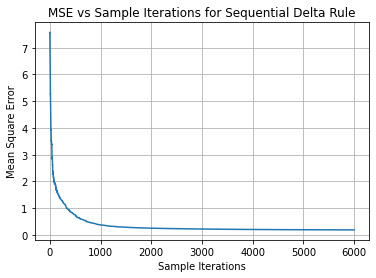

In [788]:
# Show mse over sample iterations
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('MSE vs Sample Iterations for Sequential Delta Rule')
ax.set_ylabel('Mean Square Error')
ax.set_xlabel('Sample Iterations')
ax.plot(samples_mse)
plt.show()

In [789]:
# Test classifier
T_guessed = lab1a.classify(W,X,T)

Class A. Hits = 100, Fails = 0, Accuracy = 100.0%
Class B. Hits = 100, Fails = 0, Accuracy = 100.0%
Hits = 200, Fails = 0, Accuracy = 100.0%


## Delta Batch Learning

In [790]:
# LEARNING PROCESS
def delta_batch_learning(lr, n_epocs, N, X, T, W) :
    epocs_mse = []
    epocs_error = []
    epocs_error.append(lab1a.accuracy(W,X,T))
    for k in range(n_epocs) :

        # Update weights
        delta_W = lab1a.delta_rule_batch(lr,X,T,W)
        W = W + delta_W

        # Update error
        e = W.dot(X)-T
        mse = np.sum(np.square(e))/(2*N)
        epocs_mse.append(mse)

        epocs_error.append(lab1a.accuracy(W,X,T))

        #print('{}. MSE = {} , delta_W = {}'.format(i,mse,delta_W))
        #time.sleep(0.5)

    return W, epocs_mse, epocs_error

In [791]:
# Iterate over epocs to get final weights
lr = 0.00075
W, epocs_mse, epocs_error_2 = delta_batch_learning(lr, n_epocs, N, X, T, W_init)

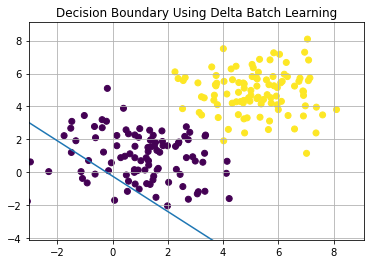

In [792]:

# Show final decision boundary
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Decision Boundary Using Delta Batch Learning')
ax.set_xlim(min1,max1)
ax.set_ylim(min2,max2)
ax.scatter(X[0,:], X[1,:], c=T)
x_coords, y_coords = lab1a.decision_boundary(W)
ax.plot(x_coords,y_coords)
plt.show()

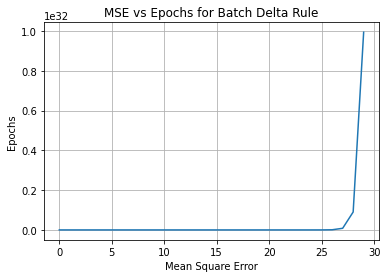

In [793]:
# Show mse over iterations
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('MSE vs Epochs for Batch Delta Rule')
ax.set_xlabel('Mean Square Error')
ax.set_ylabel('Epochs')
ax.plot(epocs_mse)
plt.show()

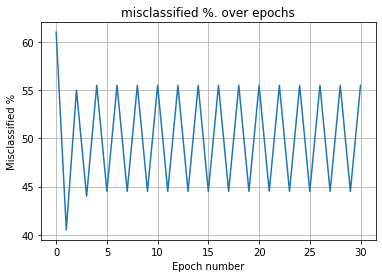

In [794]:
# Show misclassified over iterations
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('misclassified %. over epochs')
ax.set_xlabel('Epoch number')
ax.set_ylabel('Misclassified %')
ax.plot(epocs_error_2)
plt.show()

In [795]:
# Test classifier
T_guessed = lab1a.classify(W,X,T)


Class A. Hits = 89, Fails = 11, Accuracy = 89.0%
Class B. Hits = 0, Fails = 100, Accuracy = 0.0%
Hits = 89, Fails = 111, Accuracy = 44.5%


## Removing the bias

In [796]:
# Class A
mean_A, cov_A = (-2,-2), [[0.5, 0], [0, 0.5]]
X_A_nobias = np.random.multivariate_normal(mean_A, cov_A, N).T
X_A_nobias = np.append(X_A_nobias,[np.ones(N)],axis=0) # Account for bias term
X_A_nobias = np.append(X_A_nobias,[-1*np.ones(N)],axis=0) # Class label

# Class B
mean_B, cov_B = (3,3), [[0.5, 0], [0, 0.5]]
X_B_nobias = np.random.multivariate_normal(mean_B, cov_B, N).T
X_B_nobias = np.append(X_B_nobias,[np.ones(N)],axis=0) # Account for bias term
X_B_nobias = np.append(X_B_nobias,[np.ones(N)],axis=0) # Class label

# Mix classes and sample N columns
random_col_indices = np.random.choice(2*N, size=2*N, replace=False)
X_nobias = np.append(X_A_nobias,X_B_nobias,axis=1)[:,random_col_indices]

# Define labels vector
T = X_nobias[-1,:]
X_nobias = X_nobias[:-1,:]
# Remove the bias row
X_nobias = X_nobias[:-1,:]

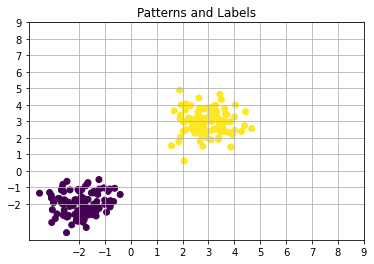

In [797]:
# Plot the patterns and labels
min1, max1 = X_nobias[1, :].min() - 1, X_nobias[1, :].max() + 1 #1st feature
min2, max2 = X_nobias[0, :].min() - 1, X_nobias[0, :].max() + 1 #2nd feature

fig, ax = plt.subplots()
ax.scatter(X_nobias[0,:], X_nobias[1,:], c=T)
ax.set(xticks=np.arange(-2, 10),
       yticks=np.arange(-2, 10))
ax.grid(visible = True)
ax.set_title('Patterns and Labels')
plt.show()

In [798]:
# Initialize weights matrix sampling from normal distribution
W = np.random.normal(0, 1, size=(Y_dim, X_dim-1))

# Iterate over epocs to get final weights
W, epocs_mse, epocs_error = delta_batch_learning (lr, n_epocs, N, X_nobias, T, W)


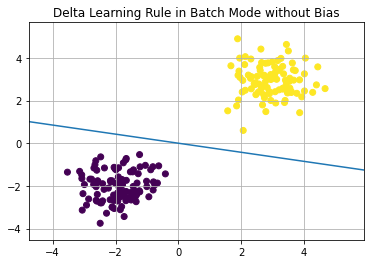

In [799]:
# Show final decision boundary
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Delta Learning Rule in Batch Mode without Bias')
ax.set_xlim(min1,max1)
ax.set_ylim(min2,max2)
ax.scatter(X_nobias[0,:], X_nobias[1,:], c=T)
x_coords, y_coords = lab1a.decision_boundary(W)
ax.plot(x_coords,y_coords)
plt.show()

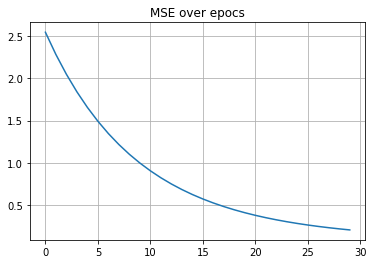

In [800]:
# Show mse over iterations
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('MSE over epocs')
ax.plot(epocs_mse)
plt.show()

In [801]:
# Test classifier
T_guessed = lab1a.classify(W,X_nobias,T)

Class A. Hits = 100, Fails = 0, Accuracy = 100.0%
Class B. Hits = 100, Fails = 0, Accuracy = 100.0%
Hits = 200, Fails = 0, Accuracy = 100.0%


##

## Classification of samples that are not linearly separable

In [802]:
# Class A
# Class A
mean_A_first, cov_A = (-1,0.3), [[0.2**2, 0], [0, 0.2**2]]
mean_A_second = (1,0.3)

X_A_first = np.random.multivariate_normal(mean_A_first, cov_A, round(N/2)).T
X_A_second = np.random.multivariate_normal(mean_A_second, cov_A, round(N/2)).T

X_A = np.append(X_A_first, X_A_second, axis=1)

X_A = np.append(X_A,[np.ones(2*round(N/2))],axis=0) # Account for bias term
X_A = np.append(X_A,[-1*np.ones(N)],axis=0) # Class label

# Class B
mean_B, cov_B = (0,-0.1), [[0.3**2, 0], [0, 0.3**2]]
X_B = np.random.multivariate_normal(mean_B, cov_B, N).T
X_B = np.append(X_B,[np.ones(N)],axis=0) # Account for bias term
X_B = np.append(X_B,[np.ones(N)],axis=0) # Class label

### Random 25% from each class

In [803]:

# Subsample classes
random_subs_indices = np.random.choice(N, size=int(N*0.75), replace=False)
X_A_subs = X_A[:,random_subs_indices]
X_B_subs = X_B[:,random_subs_indices]

# Mix classes
random_col_indices = np.random.choice(int(1.5*N), size=int(1.5*N), replace=False)
X_subs = np.append(X_A_subs,X_B_subs,axis=1)[:,random_col_indices]

# Define labels vector
T = X_subs[-1,:]
X_subs = X_subs[:-1,:]



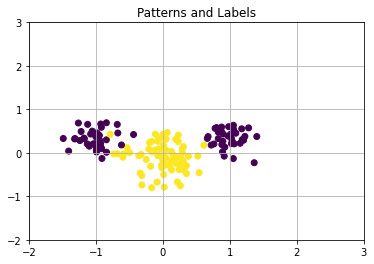

In [804]:
# Plot the patterns and labels
min1, max1 = X_subs[1, :].min() - 1, X_subs[1, :].max() + 1 #1st feature
min2, max2 = X_subs[0, :].min() - 1, X_subs[0, :].max() + 1 #2nd feature

fig, ax = plt.subplots()
ax.scatter(X_subs[0,:], X_subs[1,:], c=T)
ax.set(xticks=np.arange(-2, 4),
       yticks=np.arange(-2, 4))
ax.grid(visible = True)
ax.set_title('Patterns and Labels')
plt.show()

In [805]:
# Iterate over epocs to get final weights
W, epocs_mse, epocs_error  = delta_batch_learning (lr, n_epocs, N, X_subs, T, W_init)

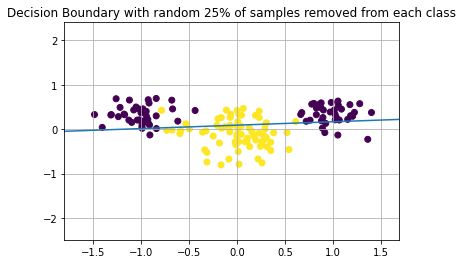

In [806]:
# Show final decision boundary
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Decision Boundary with random 25% of samples removed from each class')
ax.set_xlim(min1,max1)
ax.set_ylim(min2,max2)
ax.scatter(X_subs[0,:], X_subs[1,:], c=T)
x_coords, y_coords = lab1a.decision_boundary(W)
ax.plot(x_coords,y_coords)
plt.show()

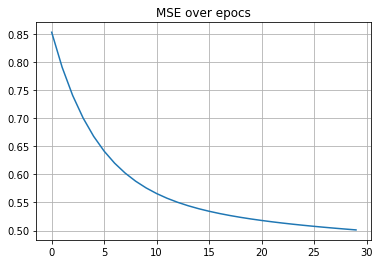

In [807]:
# Show mse over iterations
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('MSE over epocs')
ax.plot(epocs_mse)
plt.show()

In [808]:
# Test classifier
T_guessed = lab1a.classify(W,X_subs,T)

Class A. Hits = 68, Fails = 7, Accuracy = 90.667%
Class B. Hits = 56, Fails = 19, Accuracy = 74.667%
Hits = 124, Fails = 26, Accuracy = 82.667%


### Random 50% from class A

In [809]:
# Subsample classes
random_subs_indices = np.random.choice(N, size=int(N*0.5), replace=False)
X_A_subs = X_A[:,random_subs_indices]
X_B_subs = X_B

# Mix classes
random_col_indices = np.random.choice(int(1.5*N), size=int(1.5*N), replace=False)
X_subs = np.append(X_A_subs,X_B_subs,axis=1)[:,random_col_indices]

# Define labels vector
T = X_subs[-1,:]
X_subs = X_subs[:-1,:]

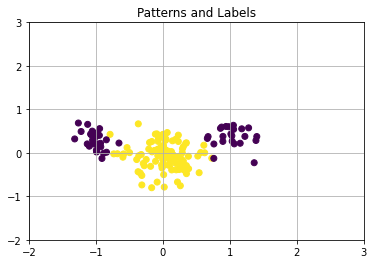

In [810]:
# Plot the patterns and labels
min1, max1 = X_subs[1, :].min() - 1, X_subs[1, :].max() + 1 #1st feature
min2, max2 = X_subs[0, :].min() - 1, X_subs[0, :].max() + 1 #2nd feature

fig, ax = plt.subplots()
ax.scatter(X_subs[0,:], X_subs[1,:], c=T)
ax.set(xticks=np.arange(-2, 4),
       yticks=np.arange(-2, 4))
ax.grid(visible = True)
ax.set_title('Patterns and Labels')
plt.show()

In [811]:
# Iterate over epocs to get final weights
W, epocs_mse, epocs_error = delta_batch_learning (lr, n_epocs, N, X_subs, T, W_init)

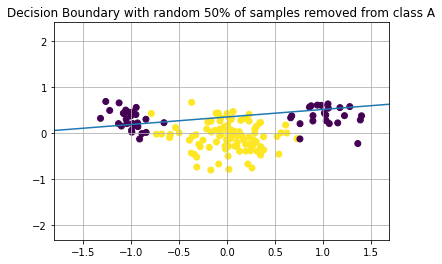

In [812]:
# Show final decision boundary
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Decision Boundary with random 50% of samples removed from class A')
ax.set_xlim(min1,max1)
ax.set_ylim(min2,max2)
ax.scatter(X_subs[0,:], X_subs[1,:], c=T)
x_coords, y_coords = lab1a.decision_boundary(W)
ax.plot(x_coords,y_coords)
plt.show()

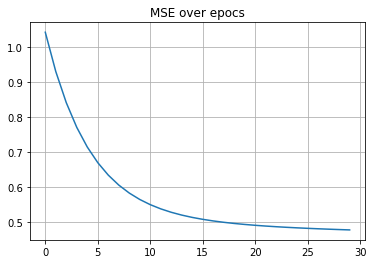

In [813]:
# Show mse over iterations
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('MSE over epocs')
ax.plot(epocs_mse)
plt.show()

In [814]:
# Test classifier
T_guessed = lab1a.classify(W,X_subs,T)

Class A. Hits = 26, Fails = 24, Accuracy = 52.0%
Class B. Hits = 93, Fails = 7, Accuracy = 93.0%
Hits = 119, Fails = 31, Accuracy = 79.333%


### Random 50% from class B

In [815]:
# Subsample classes
random_subs_indices = np.random.choice(N, size=int(N*0.5), replace=False)
X_A_subs = X_A
X_B_subs = X_B[:,random_subs_indices]

# Mix classes
random_col_indices = np.random.choice(int(1.5*N), size=int(1.5*N), replace=False)
X_subs = np.append(X_A_subs,X_B_subs,axis=1)[:,random_col_indices]

# Define labels vector
T = X_subs[-1,:]
X_subs = X_subs[:-1,:]

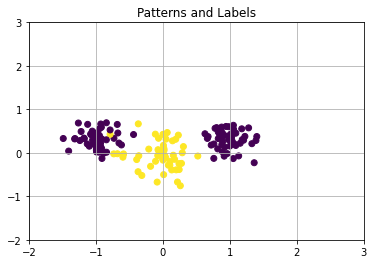

In [816]:
# Plot the patterns and labels
min1, max1 = X_subs[1, :].min() - 1, X_subs[1, :].max() + 1 #1st feature
min2, max2 = X_subs[0, :].min() - 1, X_subs[0, :].max() + 1 #2nd feature

fig, ax = plt.subplots()
ax.scatter(X_subs[0,:], X_subs[1,:], c=T)
ax.set(xticks=np.arange(-2, 4),
       yticks=np.arange(-2, 4))
ax.grid(visible = True)
ax.set_title('Patterns and Labels')
plt.show()

In [817]:
# Iterate over epocs to get final weights
W, epocs_mse, epocs_error = delta_batch_learning (lr, n_epocs, N, X_subs, T, W_init)

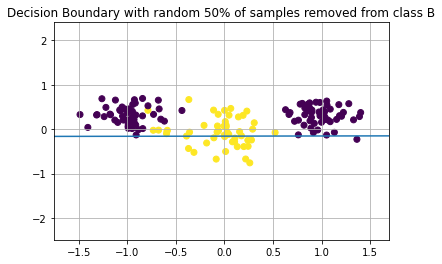

In [818]:
# Show final decision boundary
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Decision Boundary with random 50% of samples removed from class B')
ax.set_xlim(min1,max1)
ax.set_ylim(min2,max2)
ax.scatter(X_subs[0,:], X_subs[1,:], c=T)
x_coords, y_coords = lab1a.decision_boundary(W)
ax.plot(x_coords,y_coords)
plt.show()

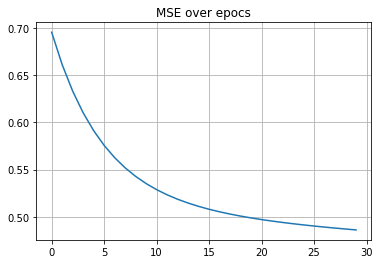

In [819]:
# Show mse over iterations
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('MSE over epocs')
ax.plot(epocs_mse)
plt.show()

In [820]:
# Test classifier
T_guessed = lab1a.classify(W,X_subs,T)

Class A. Hits = 99, Fails = 1, Accuracy = 99.0%
Class B. Hits = 17, Fails = 33, Accuracy = 34.0%
Hits = 116, Fails = 34, Accuracy = 77.333%


### 20% from negative x subset of A and 80% positive x subset of A

In [821]:
# Separate between positive and negative
columns_bool = X_A[0,:] > 0
X_A_pos = X_A[:,columns_bool]
X_A_neg = X_A[:,((columns_bool-1)*-1).astype('bool')]

# Subsample classes
X_B_subs = X_B
random_subs_indices = np.random.choice(np.shape(X_A_pos)[1], size=int(np.shape(X_A_pos)[1]*0.2), replace=False)
X_A_subs_pos = X_A_pos[:,random_subs_indices]
np.shape(X_A_subs_pos)


(4, 10)

In [822]:

random_subs_indices = np.random.choice(np.shape(X_A_neg)[1], size=int(np.shape(X_A_neg)[1]*0.8), replace=False)
X_A_subs_neg = X_A_neg[:,random_subs_indices]
np.shape(X_A_subs_neg)

(4, 40)

In [823]:
# Mix classes
N_subs = np.shape(X_A_subs_neg)[1] + np.shape(X_A_subs_pos)[1] + np.shape(X_B_subs)[1]
random_col_indices = np.random.choice(N_subs, size=N_subs, replace=False)
X_subs = np.append(X_B_subs,np.append(X_A_subs_pos,X_A_subs_neg,axis=1),axis=1)[:,random_col_indices]

# Define labels vector
T = X_subs[-1,:]
X_subs = X_subs[:-1,:]


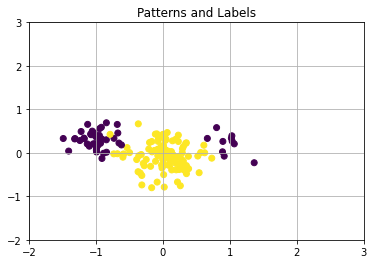

In [824]:
# Plot the patterns and labels
min1, max1 = X_subs[1, :].min() - 1, X_subs[1, :].max() + 1 #1st feature
min2, max2 = X_subs[0, :].min() - 1, X_subs[0, :].max() + 1 #2nd feature

fig, ax = plt.subplots()
ax.scatter(X_subs[0,:], X_subs[1,:], c=T)
ax.set(xticks=np.arange(-2, 4),
       yticks=np.arange(-2, 4))
ax.grid(visible = True)
ax.set_title('Patterns and Labels')
plt.show()

In [825]:
# Iterate over epocs to get final weights
W, epocs_mse, epocs_error = delta_batch_learning (lr, n_epocs, N, X_subs, T, W_init)

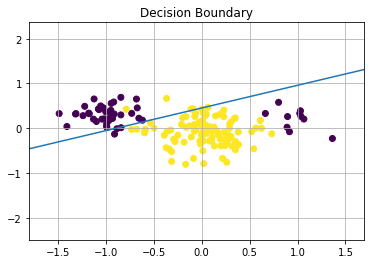

In [826]:
# Show final decision boundary
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Decision Boundary')
ax.set_xlim(min1,max1)
ax.set_ylim(min2,max2)
ax.scatter(X_subs[0,:], X_subs[1,:], c=T)
x_coords, y_coords = lab1a.decision_boundary(W)
ax.plot(x_coords,y_coords)
plt.show()

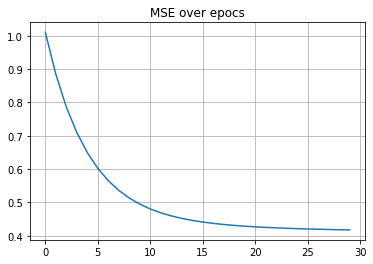

In [827]:
# Show mse over iterations
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('MSE over epocs')
ax.plot(epocs_mse)
plt.show()

In [828]:
# Test classifier
T_guessed = lab1a.classify(W,X_subs,T)

Class A. Hits = 37, Fails = 13, Accuracy = 74.0%
Class B. Hits = 96, Fails = 4, Accuracy = 96.0%
Hits = 133, Fails = 17, Accuracy = 88.667%
